In [1]:
# import os
# from accelerate.utils import write_basic_config

# write_basic_config()  # Write a config file
# os._exit(00)  # Restart the notebook

In [2]:
import os
import sys

os.chdir("..")
sys.path.append(os.getcwd())
os.getcwd()

'/group/pmc026/nchoong/QuantumTransformer'

In [3]:
from transformer.pytorch.main_no_embed import main
from transformer.pytorch.utils.plots import plot_metrics

2024-09-29 02:33:41.759724: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-09-29 02:33:41.772808: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-09-29 02:33:41.788361: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-09-29 02:33:41.793070: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-09-29 02:33:41.804957: I tensorflow/core/platform/cpu_feature_guar

In [4]:
from config import dev

dev

device(type='cuda')

In [5]:
import random
import numpy as np
import torch
import tensorflow as tf

In [6]:
seed = 42

os.environ["PYTHONHASHSEED"] = str(seed)
random.seed(seed)
np.random.seed(seed)
tf.random.set_seed(seed)
os.environ["TF_DETERMINISTIC_OPS"] = "1"
os.environ["TF_CUDNN_DETERMINISTIC"] = "1"
tf.config.threading.set_inter_op_parallelism_threads(1)
tf.config.threading.set_intra_op_parallelism_threads(1)

os.environ["OMP_NUM_THREADS"] = str(os.cpu_count())
os.environ["TF_NUM_INTEROP_THREADS"] = str(os.cpu_count())
os.environ["TF_NUM_INTRAOP_THREADS"] = str(os.cpu_count())

tf.config.threading.set_intra_op_parallelism_threads(os.cpu_count())
tf.config.threading.set_inter_op_parallelism_threads(os.cpu_count())

torch.manual_seed(seed)
torch.cuda.manual_seed(seed)
torch.backends.cudnn.deterministic = True
torch.backends.cudnn.benchmark = False

In [8]:
train_loss, train_acc, val_loss, val_acc, train_auc, val_auc, best_dict = main(
    n_epochs=30,
    sample_size=0,
    batch_size=64,
    embed_dim=64,
    num_heads=4,
    num_blocks=6,
    tqdm_disabled=False,
    batch=True,
)

classiscal_metrics = {
    "train_loss": train_loss,
    "train_acc": train_acc,
    "val_loss": val_loss,
    "val_acc": val_acc,
    "train_auc": train_auc,
    "val_auc": val_auc,
    "best_dict": best_dict,
}

train_data:  20000
pos:  10006
neg:  9994
pos:  2494
neg:  2506
pos:  12500
neg:  12500
++ There will be 6 transformer blocks
The model has 162,017 trainable parameters


Epoch  30/30: 100%|██████████| 313/313 [00:14<00:00, 21.16batch/s, Epoch = 0m 14s, Loss = 0.2884|0.3459, Acc = 0.874|0.853, AUC = 94.904|93.366]


TOTAL TIME = 404.49s
BEST ACC = 0.86% AT EPOCH 8
BEST AUC = 93.44 AT EPOCH 6


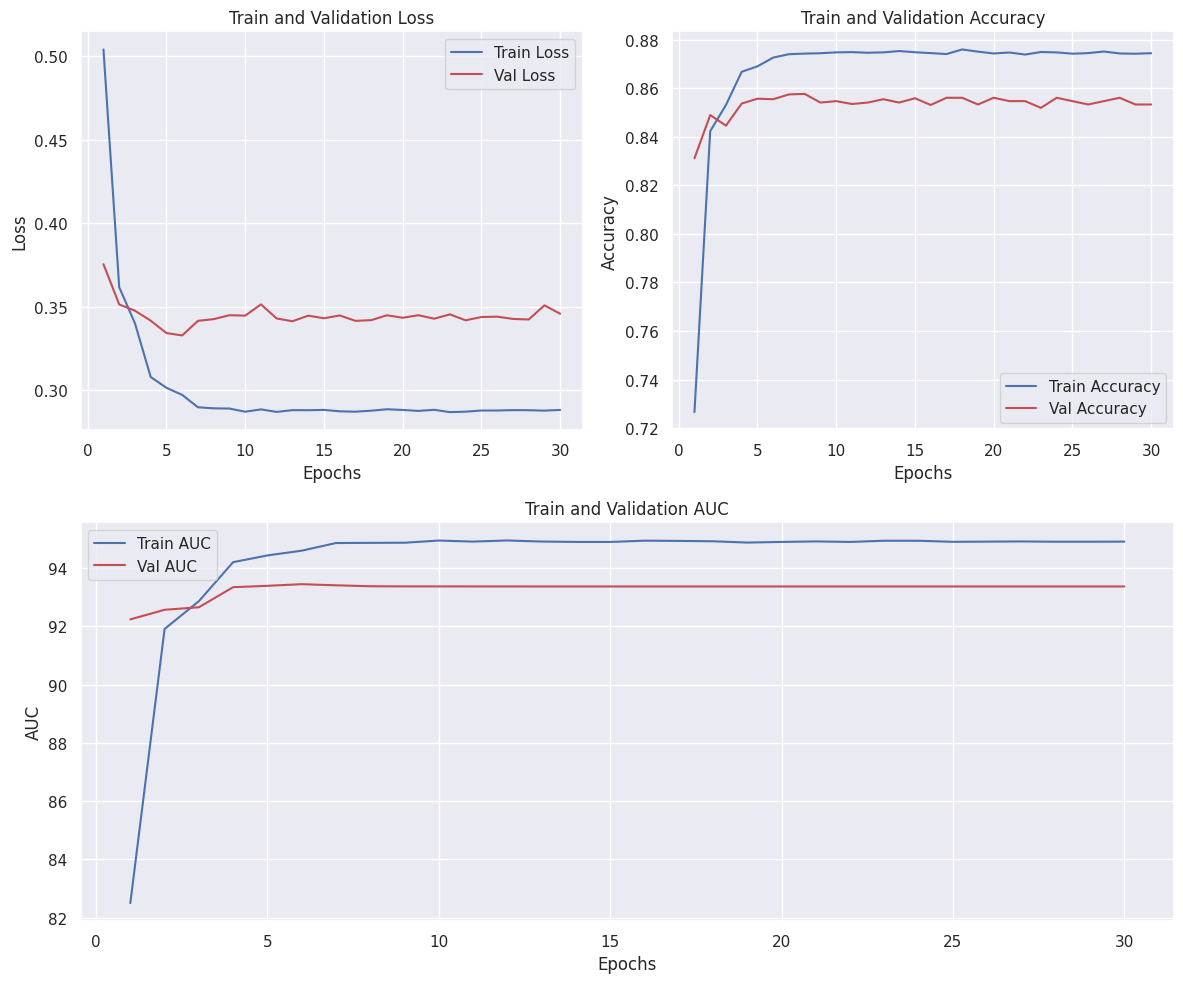

In [9]:
plot_metrics(train_loss, val_loss, train_acc, val_acc, train_auc, val_auc)

In [10]:
train_loss, train_acc, val_loss, val_acc, train_auc, val_auc, best_dict = main(
    n_epochs=30,
    sample_size=0,
    batch_size=128,
    embed_dim=64,
    num_heads=4,
    num_blocks=6,
    tqdm_disabled=False,
    batch=True,
    multi_gpu=True,
)

classiscal_metrics = {
    "train_loss": train_loss,
    "train_acc": train_acc,
    "val_loss": val_loss,
    "val_acc": val_acc,
    "train_auc": train_auc,
    "val_auc": val_auc,
    "best_dict": best_dict,
}

train_data:  20000
pos:  10006
neg:  9994
pos:  2494
neg:  2506
pos:  12500
neg:  12500
++ There will be 6 transformer blocks
The model has 162,017 trainable parameters


Epoch   1/30:   0%|          | 0/157 [00:00<?, ?batch/s]/group/pmc026/nchoong/qt/lib/python3.11/site-packages/torch/nn/modules/linear.py:117: UserWarning: Attempting to run cuBLAS, but there was no current CUDA context! Attempting to set the primary context... (Triggered internally at ../aten/src/ATen/cuda/CublasHandlePool.cpp:135.)
  return F.linear(input, self.weight, self.bias)
Epoch  30/30: 100%|██████████| 157/157 [00:14<00:00, 11.11batch/s, Epoch = 0m 14s, Loss = 0.3005|0.3363, Acc = 0.869|0.853, AUC = 94.516|93.478]


TOTAL TIME = 486.23s
BEST ACC = 0.86% AT EPOCH 4
BEST AUC = 93.48 AT EPOCH 9


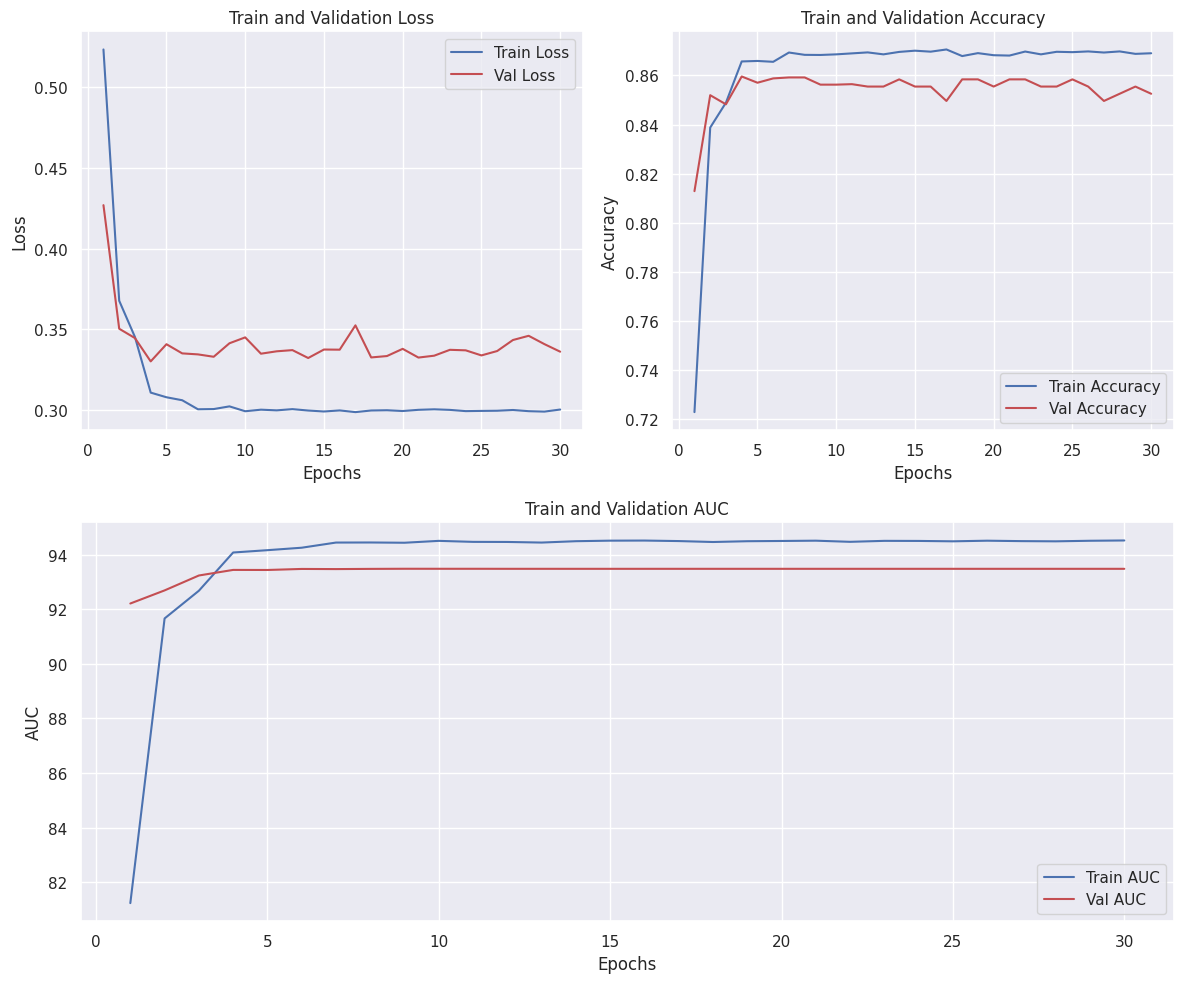

In [11]:
plot_metrics(train_loss, val_loss, train_acc, val_acc, train_auc, val_auc)

/group/pmc026/nchoong/qt/lib/python3.11/site-packages/pennylane/drawer/draw.py:37: PennyLaneDeprecationWarning: The 'expansion_strategy' argument is deprecated and will be removed in version 0.39. Instead, use the 'level' argument which offers more flexibility and options.
  warnings.warn(


(<Figure size 600x700 with 1 Axes>, <Axes: >)

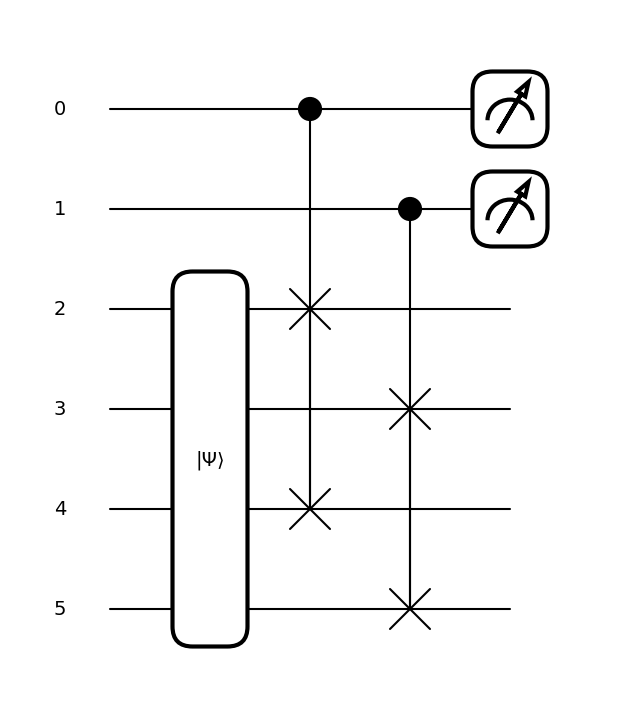

In [12]:
import pennylane as qml
from pennylane import numpy as np
from pennylane.templates import AmplitudeEmbedding

# define two random input vectors
inp1 = np.array([1, 2, 0, 0])
inp2 = np.array([0, 1, 0, 0])

qubit_number = int(np.ceil(np.log2(len(inp1))))

dev = qml.device("default.qubit", wires=3 * qubit_number)


@qml.qnode(dev, interface="torch")
def prepare_reg1(inp):
    AmplitudeEmbedding(
        features=inp,
        wires=range(qubit_number, 3 * qubit_number),
        normalize=True,
        pad_with=0.0,
    )

    ancillea = []
    for i in range(qubit_number):

        anc = i
        ancillea.append(anc)
        first_state = i + qubit_number
        second_state = i + 2 * qubit_number
        qml.CSWAP(wires=[anc, first_state, second_state])

    return qml.expval(qml.operation.Tensor(*[qml.PauliZ(i) for i in ancillea]))


input_state = np.concatenate([inp1, inp2])
prepare_reg1(input_state)

qml.draw_mpl(prepare_reg1, expansion_strategy="device")(input_state)
# print(prepare_reg1.draw())

In [13]:
np.log2(len(np.array([1, 2, 0, 0])))

2.0

In [14]:
import numpy as np

A = np.array(
    [
        [-0.51192128, -0.51192128, 0.6237114, 0.6237114],
        [0.97041007, 0.97041007, 0.99999329, 0.99999329],
        [0.82429855, 0.82429855, 0.98175843, 0.98175843],
        [0.99675093, 0.99675093, 0.83514837, 0.83514837],
    ]
)


A.flatten()

array([-0.51192128, -0.51192128,  0.6237114 ,  0.6237114 ,  0.97041007,
        0.97041007,  0.99999329,  0.99999329,  0.82429855,  0.82429855,
        0.98175843,  0.98175843,  0.99675093,  0.99675093,  0.83514837,
        0.83514837])